## 5. Nižji standardi

V tem razdelku omejimo stroge pogoje, da smo zadovoljni le z najbolšim kandidatom.

Pri prejšnjih poskusih smo bili zadovoljni, le če smo nakoncu izbrali najbolšega partnerja. Pri tem smo bili dokaj uspešni, saj smo z pravim modelom izbrali najbolšega kandidata skoraj tretino časa.

To je sicer super rezultat, ampak če je aternativa, da v preostalih dveh tretinah ne najdemo partnerja, se najbž nihče ne bi odločil za to strategijo.

V realnosti ni res, da smo zadovoljni samo z najbolšo izbiro vse ostale pa vržemo v isti koš. Zato v tem poglabju raziščemo druge načine ocenjevanja uspešnosti modela.

1. Sprostimo omejitev za p %. (Pomeni, da smo zadovoljni, če je naš izbrani kandidat v top p % vseh kandidatov.)  

2. Z izbrano osebo smo zadovoljni točno toliko, kot je njena ocena. (Za ugotovitev uspešnosti računamo povprečje po vseh izbranih kandidatih.)

3. Je kombinacija zgornjih dveh. (Zadovoljni smo le z najbolšimi p % kandidatov ter na njih povprečimo.)

### 5.1

V tem podpoglavju raziščemo prvo strategijo opisano zgoraj.

In [56]:
import numpy as np
import random
n = 100 # število kandidatk
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

In [57]:
def NajbolsiPartner(partnerji, stop):
    """Funkcija, ki vrne izbranega partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 

    vzorec = partnerji[:stop] #vključno s stop
    poroka = partnerji[stop:]

    najbolši = 0 
    za_vedno = 0
    for partner in vzorec:
        if (partner > najbolši):
            najbolši = partner
   
    for partner in poroka:
        if (partner > najbolši):
            za_vedno = partner
            break
   
    return za_vedno

In [58]:
def NajbolsiPartner_povprecje(partnerji, stop, alfa):
    """Funkcija, ki vrne izbranega partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 
    # alpha ... faktor s katerim pomnožimo povprečje

    vzorec = partnerji[:stop] #vključno s stop
    dovolj_dober = np.mean(vzorec) * alfa

    poroka = partnerji[stop:]
    za_vedno = 0
    
    for partner in poroka:
        if (partner >= dovolj_dober):
            za_vedno = partner
            break
   
    return za_vedno

In [59]:
p = 0.1

In [60]:
alfa = 1.8 #kasneje vidimo, da se to najbolj splača

In [61]:
vsotke = [0] * n
vsotke_pov = [0] * n
dovolj_dober = n*(1-p)

for stop in range(n):
    for i in range(m):
        if NajbolsiPartner(tabela_partnerjev[i], stop) > dovolj_dober :
            vsotke[stop] += 1
        if NajbolsiPartner_povprecje(tabela_partnerjev[i], stop,alfa) > dovolj_dober:
            vsotke_pov[stop] += 1

c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


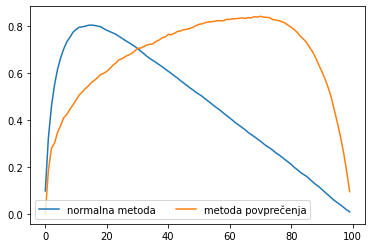

In [62]:
import matplotlib.pyplot as plt

verjetnosti = [x / m for x in vsotke]
verjetnosti_pov = [x / m for x in vsotke_pov]
x = [i for i in range(n)]

plt.plot(x, verjetnosti, label='normalna metoda')
plt.plot(x, verjetnosti_pov, label='metoda povprečenja')
plt.legend(ncol=3)
plt.show()

In [63]:
print("Zgoraj narisani funkciji dosežeta maksimum pri", np.argmax(vsotke), "in", np.argmax(vsotke_pov), ".")

Zgoraj narisani funkciji dosežeta maksimum pri 15 in 70 .


In [64]:
y1 = vsotke
y2 = vsotke_pov
# Finding intersection
intersection_points = []
for i in range(len(x) - 1):
    if (y1[i] - y2[i]) * (y1[i+1] - y2[i+1]) < 0:  # Sign change indicates intersection
        # Linear interpolation to find intersection point
        x_intersect = x[i] - ((y1[i] - y2[i]) * (x[i+1] - x[i]) / (y1[i+1] - y1[i] - y2[i+1] + y2[i]))
        y_intersect = y1[i] + (y1[i+1] - y1[i]) * (x_intersect - x[i]) / (x[i+1] - x[i])
        intersection_points.append((x_intersect, y_intersect))
round(intersection_points[0][0],2)

29.95

Ter se sekata pri zgornji številki.

#### Poglejmo za različne alphe

In [65]:
alf = [2, 1.9, 1.8, 1.7, 1.6]

In [66]:
dovolj_dober = n*(1-p)
velike_vsote = []

for alfa in alf:
    vsotke = [0] * n
    for stop in range(n):
        for i in range(m):
            if NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa) > dovolj_dober:
                vsotke[stop] += 1
    velike_vsote.append(vsotke)

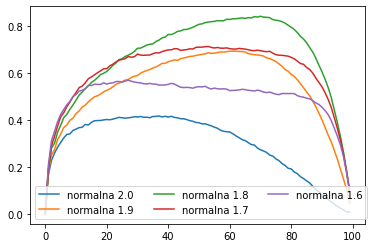

In [67]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

for i in range(5):
    verjetnosti = [x / m for x in velike_vsote[i]]
    plt.plot(x,verjetnosti, label=f'normalna {2-i*0.1}')


plt.legend(ncol=3)
plt.show()

### 5.2

V tem podrazdelku računamo kako dobri so naši rezultati, če smo zvsakim zadovoljni ravno toliko kot je njegova ocena.